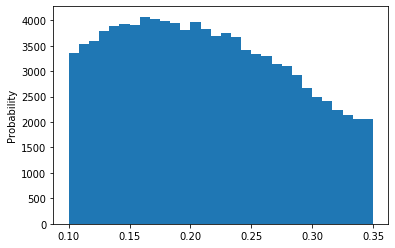

In [9]:
import pandas as pd
import matplotlib.pyplot as plt
import os
import numpy as np
%matplotlib inline
import torch
csv_path = "/home/riccardo/Desktop/Data/100k_3digt_BWE/digts/digts.csv"
train_image_paths = "/home/riccardo/Desktop/Data/100k_3digt_BWE/digts/train/orig"
train_data_size = len(os.listdir(train_image_paths))

train_test_type = 'train'

train_data = pd.read_csv(csv_path, header=None)
if train_data.shape[1] > 37:
    if train_test_type=='train':
        digt_list_train = train_data.iloc[:, [5,21, 37]].values.astype(int)
        x_back = train_data.iloc[:, 6].values.astype(float)
        y_back = train_data.iloc[:, 7].values.astype(float)
        x_mid = train_data.iloc[:, 22].values.astype(float)
        y_mid = train_data.iloc[:, 23].values.astype(float)
        x_front = train_data.iloc[:, 38].values.astype(float)
        y_front = train_data.iloc[:, 39].values.astype(float)

distance = np.sqrt((x_front - x_back)**2 + (y_front - y_back)**2)

plt.hist(distance, bins=30)
plt.ylabel('Probability');
plt.savefig('hist_distances.png')

In [7]:
 range(digt_list_train.shape[1])

range(0, 3)

In [12]:
digt_list_train

array([[3, 1, 5],
       [8, 9, 7],
       [0, 3, 1],
       ...,
       [4, 7, 1],
       [4, 2, 0],
       [3, 7, 1]])

In [13]:
n_values = 10
back = torch.FloatTensor(np.eye(n_values)[digt_list_train[:,0]])
mid =  torch.FloatTensor(np.eye(n_values)[digt_list_train[:,1]])
front =  torch.FloatTensor(np.eye(n_values)[digt_list_train[:,2]])
front

tensor([[0., 0., 0.,  ..., 0., 0., 0.],
        [0., 0., 0.,  ..., 1., 0., 0.],
        [0., 1., 0.,  ..., 0., 0., 0.],
        ...,
        [0., 1., 0.,  ..., 0., 0., 0.],
        [1., 0., 0.,  ..., 0., 0., 0.],
        [0., 1., 0.,  ..., 0., 0., 0.]])